# Gather Data

In [52]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
from collections import Counter
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [53]:
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


# Image Prediction Data

In [7]:
# image predictions
tsv = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv)

with open(tsv.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Configure Twitter

In [4]:
# Access the twitter archives 
from tweepy.parsers import JSONParser
consumer_key = "Hidden"
consumer_secret = "Hidden"
access_token = "Hidden"
access_secret = "Hidden" 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=JSONParser(), wait_on_rate_limit=True)


In [5]:
#search api
tweet = api.get_status(887473957103951883,tweet_mode='extended')

In [6]:
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jul 19 00:47:34 +0000 2017',
 'display_text_range': [0, 99],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/cLyzpcUcMX',
    'expanded_url': 'https://twitter.com/dog_rates/status/887473957103951883/photo/1',
    'id': 887473949361045505,
    'id_str': '887473949361045505',
    'indices': [100, 123],
    'media_url': 'http://pbs.twimg.com/media/DFDw2tsUAAEw7XW.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFDw2tsUAAEw7XW.jpg',
    'sizes': {'large': {'h': 1510, 'resize': 'fit', 'w': 900},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 715},
     'small': {'h': 680, 'resize': 'fit', 'w': 405},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/cLyzpcUcMX'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/cLyzpcUcMX',
    'expanded_url': 'https://twitter.com/dog

In [10]:
# Query the api and get erroneous tweets. Track timing of tweet completion as well.
df_list = []
errors_list = []

tweets = archive['tweet_id']

now = time.time()

for index, t in enumerate(tweets):

    try:
        start = time.time()
        tweet = api.get_status(t,tweet_mode='extended')
        end = time.time()
        print("Reading Tweet {}/{}. ({}%) complete. Elapsed Time = {}".format((index+1),len(tweets), round(((index+1)/len(tweets)) * 100,1), round((end - start),2)))
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({'tweet_id':int(t),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)
                       })

    
    
    except Exception as e:
        print(str(t) + str(e))
        errors_list.append(t)

then = time.time()
diff = round(then - now)
minutes = diff // 60
seconds = diff % 60
print("Reading Process Completed. Elapsed Time is {}:{}".format(minutes, seconds))


Reading Tweet 1/2356. (0.0%) complete. Elapsed Time = 0.17
Reading Tweet 2/2356. (0.1%) complete. Elapsed Time = 0.16
Reading Tweet 3/2356. (0.1%) complete. Elapsed Time = 0.18
Reading Tweet 4/2356. (0.2%) complete. Elapsed Time = 0.16
Reading Tweet 5/2356. (0.2%) complete. Elapsed Time = 0.24
Reading Tweet 6/2356. (0.3%) complete. Elapsed Time = 0.13
Reading Tweet 7/2356. (0.3%) complete. Elapsed Time = 0.21
Reading Tweet 8/2356. (0.3%) complete. Elapsed Time = 0.14
Reading Tweet 9/2356. (0.4%) complete. Elapsed Time = 0.21
Reading Tweet 10/2356. (0.4%) complete. Elapsed Time = 0.13
Reading Tweet 11/2356. (0.5%) complete. Elapsed Time = 0.18
Reading Tweet 12/2356. (0.5%) complete. Elapsed Time = 0.17
Reading Tweet 13/2356. (0.6%) complete. Elapsed Time = 0.14
Reading Tweet 14/2356. (0.6%) complete. Elapsed Time = 0.19
Reading Tweet 15/2356. (0.6%) complete. Elapsed Time = 0.19
Reading Tweet 16/2356. (0.7%) complete. Elapsed Time = 0.13
Reading Tweet 17/2356. (0.7%) complete. Elapsed T

In [11]:
errors_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288,
 677228873407442944]

In [9]:
#df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
#df_json.to_json('tweet_json.txt')
df_json = pd.read_json('tweet_json.txt')
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7352,35008
1,892177421306343426,5482,30319
2,891815181378084864,3624,22802
3,891689557279858688,7534,38280
4,891327558926688256,8120,36516


# Accessing Data

In [10]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
archive['expanded_urls'].isnull().sum()

59

In [55]:
archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Ralphson      1
Mya           1
Rinna         1
Venti         1
Koko          1
Name: name, Length: 957, dtype: int64

In [56]:
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [57]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### observations

issue quality:

-- Name column has "None", "a", "the", and "an" names that don't seem to be real names

-- timestamp date is wrong format(unecessary +0000 in date). The timestamp knowledge sort is wrong; object ought to be modified 
   to timedata sort of tweet_id ought to be string rather than object
   
-- there ar fifty nine null entries within the expanded_urls column

-- rating_denominator column ought to solely have one divisor worth - ten

-- rating_numerator have values under ten that ought to be removed.

-- some ratings is extracted from the text of the tweet and be wont to fill within the rating_numerator column

issue tidiness:

-- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
 columns have null values in them. this can be a difficulty as a result of we wish solely the first tweets. we'll drop 
 these columns later within the project.

In [23]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True
541,677187300187611136,https://pbs.twimg.com/media/CWXaQMBWcAAATDi.jpg,1,English_setter,0.282396,True,Shih-Tzu,0.084112,True,Old_English_sheepdog,0.059538,True
100,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True


### observations

issues quality:

some names of dogs area unit capitalized and a few don't seem to be within the p1, p2, and p3 columns

issues tidiness:

archive, image , and df_json may be combined into one table since all of them describe one tweet

In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


In [26]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 72.8 KB


# Cleaning Data

In [58]:
# Make a copy of the dataframes before starting the cleaning process
archive_clean = archive.copy()
images_clean = images.copy()
df_json_clean = df_json.copy()

### Define

### Issue: 
"None", "a", "the" and "an" should be replaced

### Code

In [59]:
archive_clean['name'].replace("None", "NaN", inplace= True)
archive_clean['name'].replace("a", "NaN", inplace= True)
archive_clean['name'].replace("the", "NaN", inplace= True)
archive_clean['name'].replace("an", "NaN", inplace= True)

### Test

In [81]:
'None' in archive_clean['name']
'a' in archive_clean['name']
'the' in archive_clean['name']
'an' in archive_clean['name']

False

### Define
### Issue:

Timestamp format is incorrect. Change timestamp data type from object to datetime. The +0000 will drop

### Code

In [60]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [83]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

### Issue:

Data type of tweet_id should be string, not object. Change the tweet_id of 
images_clean dataframe and df_json_clean dataframe to string as well.

### Code

In [61]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)
df_json_clean.tweet_id = df_json_clean.tweet_id.astype(str)

### Test

In [84]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2156 non-null   object             
 1   timestamp           2156 non-null   datetime64[ns, UTC]
 2   source              2156 non-null   object             
 3   text                2156 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2156 non-null   object             
 6   rating_denominator  2156 non-null   int64              
 7   name                2156 non-null   object             
 8   doggo               2156 non-null   object             
 9   floofer             2156 non-null   object             
 10  pupper              2156 non-null   object             
 11  puppo               2156 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1

### Define

### Issue:

The expanded_urls column has null values that need to be dropped. 
There are 59 total that we observed from the assessments.

### Code

In [62]:
archive_clean["expanded_urls"].dropna(inplace= True)

### Test

In [86]:
"NaN" in archive_clean["expanded_urls"]

False

### Define

### Issue:

The rating_denominator column should only have the denominator 10

### Code

In [63]:
archive_clean["rating_denominator"] = 10

### Test

In [88]:
archive_clean.rating_denominator.value_counts()

10    2156
Name: rating_denominator, dtype: int64

### Define

### Issue:

The numerator column should exclude numbers less than 10 but just for an example, 
we will only exclude the values 0, 1, and 2. There are only 15 entries to be excluded now.

### Code

In [64]:
# Excluding the rating_numerator that are equal to 0, 1, and 2
archive_clean = archive_clean[archive_clean.rating_numerator != 0]
archive_clean = archive_clean[archive_clean.rating_numerator != 1]
archive_clean = archive_clean[archive_clean.rating_numerator != 2]

### Test

In [90]:
archive_clean['rating_numerator'].value_counts()

12       498
10       433
11       422
13       306
9        153
8         97
7         53
14        43
5         34
6         32
3         19
4         17
.10        9
.11        4
.9         3
420        2
.12        2
45         1
1776       1
13.5       1
9.5        1
.13        1
143        1
84         1
144        1
88         1
165        1
204        1
17         1
9.75       1
182        1
121        1
666        1
007        1
20         1
99         1
24         1
44         1
960        1
60         1
15         1
.8         1
11.27      1
11.26      1
80         1
50         1
Name: rating_numerator, dtype: int64

### Define

### Issue:

We can extract numerator ratings from the tweet text and fill the missing values in rating_numerator 
column by finding the pattern 

### Code

In [65]:
archive_clean['rating_numerator'] = archive_clean.text.str.extract('(\d?\d*\.?\d\d*/)', expand=False)

Replace the / character from the rating_numerator column

In [66]:
archive_clean['rating_numerator'].replace('/','', regex=True, inplace=True)

### Test

In [91]:
archive_clean[archive_clean['tweet_id']=='680494726643068929']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,None,None,None,None


### Define

### Issue:

Capitalized and lower cased names in the p1, p2, and p3 columns. 
Replace all  names in these columns with a lower case letter.


### Code

In [67]:
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.lower()

### Test

In [93]:
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
238,670434127938719744,https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg,1,jack-o'-lantern,0.919140,False,chesapeake_bay_retriever,0.027351,True,labrador_retriever,0.020081,True
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,pembroke,0.105033,True,siberian_husky,0.077875,True
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,labrador_retriever,0.112413,True,chow,0.036953,True
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,labrador_retriever,0.719510,True,chesapeake_bay_retriever,0.122019,True,newfoundland,0.038828,True
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,labrador_retriever,0.367818,True,german_short-haired_pointer,0.280642,True,chesapeake_bay_retriever,0.184246,True
223,670303360680108032,https://pbs.twimg.com/media/CU1lWFaVAAAl0HG.jpg,1,shetland_sheepdog,0.380278,True,cardigan,0.342806,True,guinea_pig,0.156249,False
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True


### Tidyness

Issue:
Remove the retweeted images because we only want original tweets. 
Drop the columns in_reply_to_status_id, in_reply_to_user_id, 
retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. 


In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2336 non-null   object             
 1   in_reply_to_status_id       74 non-null     float64            
 2   in_reply_to_user_id         74 non-null     float64            
 3   timestamp                   2336 non-null   datetime64[ns, UTC]
 4   source                      2336 non-null   object             
 5   text                        2336 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2280 non-null   object             
 10  rating_numerator            2336 non-null   object          

# AS REQUIRED REMOVING THE RTs

In [69]:
archive_clean= archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2156 non-null   object             
 1   in_reply_to_status_id       74 non-null     float64            
 2   in_reply_to_user_id         74 non-null     float64            
 3   timestamp                   2156 non-null   datetime64[ns, UTC]
 4   source                      2156 non-null   object             
 5   text                        2156 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2101 non-null   object             
 10  rating_numerator            2156 non-null   object          

In [71]:
archive_clean.drop(['in_reply_to_status_id'], axis=1, inplace = True)
archive_clean.drop(['in_reply_to_user_id'], axis=1, inplace = True)
archive_clean.drop(['retweeted_status_id'], axis=1, inplace = True)
archive_clean.drop(['retweeted_status_user_id'], axis=1, inplace = True)
archive_clean.drop(['retweeted_status_timestamp'], axis=1, inplace = True)


In [72]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2156 non-null   object             
 1   timestamp           2156 non-null   datetime64[ns, UTC]
 2   source              2156 non-null   object             
 3   text                2156 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2156 non-null   object             
 6   rating_denominator  2156 non-null   int64              
 7   name                2156 non-null   object             
 8   doggo               2156 non-null   object             
 9   floofer             2156 non-null   object             
 10  pupper              2156 non-null   object             
 11  puppo               2156 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1

### Issue:

Define
combine all three datasets into one dataset called tweet_master_df. 
First we will combine the archive_clean dataset with images_clean dataset. 
Then we will combine that dataset with the df_json_clean dataset 

In [73]:
archive_pred = pd.merge(archive_clean, images_clean, how='left', on='tweet_id')

archive_pred dataset with the df_json_clean dataset to make a master

In [74]:
tweet_master = pd.merge(archive_pred, df_json_clean, how='left', on='tweet_id')

In [75]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2156 entries, 0 to 2155
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2156 non-null   object             
 1   timestamp           2156 non-null   datetime64[ns, UTC]
 2   source              2156 non-null   object             
 3   text                2156 non-null   object             
 4   expanded_urls       2101 non-null   object             
 5   rating_numerator    2156 non-null   object             
 6   rating_denominator  2156 non-null   int64              
 7   name                2156 non-null   object             
 8   doggo               2156 non-null   object             
 9   floofer             2156 non-null   object             
 10  pupper              2156 non-null   object             
 11  puppo               2156 non-null   object             
 12  jpg_url             1978 non-null 

Drop any rows that do not contain a jpg_url

In [76]:
tweet_master = tweet_master[tweet_master['jpg_url'].notnull()]

Set the columns to
p1_dog, p2_dog, p3_dog --> bool
rating_numerator --> float

In [77]:
tweet_master['p1_dog'] = tweet_master['p1_dog'].astype(bool)
tweet_master['p2_dog'] = tweet_master['p2_dog'].astype(bool)
tweet_master['p3_dog'] = tweet_master['p3_dog'].astype(bool)
tweet_master['rating_numerator'] = tweet_master['rating_numerator'].astype(float)

## AS REQUIRED CHANGE

### ISSUE

Define
The columns doggo, floofer, pupper, and puppo can be condensed into one column called Stage with the possible variables as doggo, floofer, pupper, and puppo.

### Code

In [98]:
# First, we will substitute all the NaN for null values. 
tweet_master['doggo'].replace('None', '', inplace=True)
tweet_master['floofer'].replace('None', '', inplace=True)
tweet_master['pupper'].replace('None', '', inplace=True)
tweet_master['puppo'].replace('None', '', inplace=True)

In [99]:
tweet_master['stage'] = tweet_master.doggo + tweet_master.floofer + tweet_master.pupper + tweet_master.puppo

In [100]:
# Then format entries with multiple dog stages which appeared like doggopupper.

tweet_master.loc[tweet_master.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
tweet_master.loc[tweet_master.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
tweet_master.loc[tweet_master.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'


## Store Data

In [101]:
tweet_master.to_csv('twitter_master.csv')

## Act
### Top rated and lowest rated dogs

In [102]:
tweet_master.sort_values(by = 'rating_numerator').head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage
904,738402415918125056,2016-06-02 16:10:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",https://twitter.com/dog_rates/status/738402415...,0.10,10,NaN,,,...,True,blenheim_spaniel,0.193905,True,chihuahua,0.078000,True,785.0,3137.0,
650,772114945936949249,2016-09-03 16:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,https://twitter.com/dog_rates/status/772114945...,0.10,10,Finn,,,...,True,toy_terrier,0.052980,True,italian_greyhound,0.037239,True,457.0,2668.0,
812,748977405889503236,2016-07-01 20:31:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,https://twitter.com/dog_rates/status/748977405...,0.10,10,not,,,...,True,bluetick,0.152810,True,english_setter,0.051835,True,3266.0,10435.0,
833,747512671126323200,2016-06-27 19:31:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,https://twitter.com/dog_rates/status/747512671...,0.10,10,NaN,,,...,True,malinois,0.095089,True,german_shepherd,0.080146,True,1544.0,5338.0,
1445,684594889858887680,2016-01-06 04:38:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",https://twitter.com/dog_rates/status/684594889...,0.10,10,NaN,,,...,True,english_setter,0.035352,True,brittany_spaniel,0.003879,True,3339.0,8540.0,
931,733482008106668032,2016-05-20 02:18:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",https://twitter.com/dog_rates/status/733482008...,0.10,10,NaN,,,...,True,computer_keyboard,0.142274,False,mouse,0.058505,False,902.0,2997.0,
891,740214038584557568,2016-06-07 16:09:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,https://twitter.com/dog_rates/status/740214038...,0.10,10,getting,,,...,True,labrador_retriever,0.189782,True,vizsla,0.067607,True,1872.0,6441.0,
897,739544079319588864,2016-06-05 19:47:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,https://twitter.com/dog_rates/status/739544079...,0.10,10,NaN,,,...,True,golden_retriever,0.016641,True,ice_bear,0.014858,False,20207.0,37932.0,
918,736010884653420544,2016-05-27 01:47:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,https://twitter.com/dog_rates/status/736010884...,0.10,10,NaN,,,...,True,labrador_retriever,0.119475,True,bluetick,0.077475,True,2824.0,7571.0,
1141,706291001778950144,2016-03-06 01:31:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,0.11,10,NaN,,,...,True,bull_mastiff,0.164087,True,staffordshire_bullterrier,0.105011,True,455.0,1643.0,


Insight:

Tweet id 740214038584557568 is the lowest rated

Tweet id 702217446468493312 is the highest rated


### Most retweeted photo

In [47]:
tweet_master.retweet_count.max()

74265.0

In [48]:
tweet_master.loc[tweet_master['retweet_count'] == 74265.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1036,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,NaN,doggo,None,None,None,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,74265.0,150517.0


Insight:
Tweet_id 744234799360020481 is the most retweeted tweet with 83727 retweets. 

### Tweet source

In [103]:
tweet_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1940
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [106]:
print(1940+27+11)
print(1940/1978)
print(27/1978)
print(11/1978)

1978
0.980788675429727
0.013650151668351871
0.005561172901921132


### Insight
98% of users are using an iPhone to view tweets, 1.4% are using a desktop, and 0.5% are using Tweetdeck.

## Report

### Correlation between retweet and favorite count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


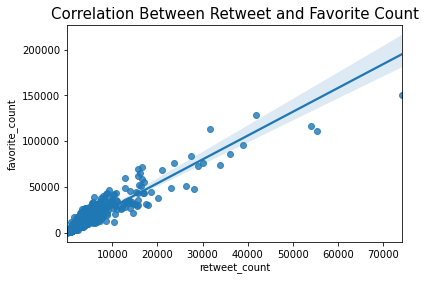

In [107]:
df = tweet_master[['retweet_count', 'favorite_count']]

# We will use seaborn to make a scatterplot with a regression line
sns.regplot(df['retweet_count'], df['favorite_count']).set_title(
    "Correlation Between Retweet and Favorite Count", size = 15)

# Save the plot so that we can use it for the separate reports
plt.savefig('Correlation Between Retweet and Favorite Count.jpg')

I selected this visual image as a result of I detected that whereas assessing for three insights, 
the most favorited and most retweeted tweet ar identical. It got Maine thinking what 
is the correlation betweetn retweet_count and favorite_count variables? 
By viewing the graph on top of and doing a visible assessment, we will infer that a 
greater variety of retweets can increase the chance that the tweet will be favorited.
 there's a steep, correlation supported the most effective match line of the graph. 
Every increase in retweet count can get multiple favorite hits.